In [106]:
# all packages need for this project
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import altair as alt
from datetime import date
import pyodbc

# Connect to database Human_resource_analytics in SQL Server

In [107]:
# connect to DBMS
conn = pyodbc.connect(
    "Driver={SQL Server};"
    "Server=Itherael;"
    "Database=Human_resource_analytics;"
    "Trusted_Connection=yes;"
)

In [108]:
# export data from DBMS and store in variable
hr_data = pd.read_sql_query("SELECT * FROM HRDataset_v14", conn)

# Data Overview

In [109]:
# total row and col of data
num_rows, num_columns = hr_data.shape
print(f"total row: {num_rows}, total col: {num_columns}")

total row: 311, total col: 36


In [110]:
# check data type
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    bool   
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    bool   
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    bool   
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    bool   
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [111]:
hr_data.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [112]:
#check all column to list 
hr_data.columns.tolist()

['Employee_Name',
 'EmpID',
 'MarriedID',
 'MaritalStatusID',
 'GenderID',
 'EmpStatusID',
 'DeptID',
 'PerfScoreID',
 'FromDiversityJobFairID',
 'Salary',
 'Termd',
 'PositionID',
 'Position',
 'State',
 'Zip',
 'DOB',
 'Sex',
 'MaritalDesc',
 'CitizenDesc',
 'HispanicLatino',
 'RaceDesc',
 'DateofHire',
 'DateofTermination',
 'TermReason',
 'EmploymentStatus',
 'Department',
 'ManagerName',
 'ManagerID',
 'RecruitmentSource',
 'PerformanceScore',
 'EngagementSurvey',
 'EmpSatisfaction',
 'SpecialProjectsCount',
 'LastPerformanceReview_Date',
 'DaysLateLast30',
 'Absences']

In [113]:
# check null value
hr_data.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [114]:
# check duplicate values
hr_data.nunique()

Employee_Name                 311
EmpID                         311
MarriedID                       2
MaritalStatusID                 5
GenderID                        2
EmpStatusID                     5
DeptID                          6
PerfScoreID                     4
FromDiversityJobFairID          2
Salary                        308
Termd                           2
PositionID                     30
Position                       32
State                          28
Zip                           158
DOB                           307
Sex                             2
MaritalDesc                     5
CitizenDesc                     3
HispanicLatino                  2
RaceDesc                        6
DateofHire                    101
DateofTermination              96
TermReason                     18
EmploymentStatus                3
Department                      6
ManagerName                    21
ManagerID                      23
RecruitmentSource               9
PerformanceSco

In [115]:
# data sample
hr_data.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

# Exploratory Data Analysis

In [116]:
# data conversion
hr_data['DateofHire'] = pd.to_datetime(hr_data['DateofHire'])
hr_data['DateofTermination'] = pd.to_datetime(hr_data['DateofTermination'])

In [117]:
# add column and handle null values
hr_data['year_of_recruitment'] = hr_data['DateofHire'].dt.year
hr_data['year_of_contract_termination'] = hr_data['DateofTermination'].dt.year.fillna(2020).astype(int) #fill na 2020 'cause this data up to date 2020
hr_data['years_of_service'] = hr_data['year_of_contract_termination'] - hr_data['year_of_recruitment']

In [118]:
recruits_per_year = hr_data.groupby('year_of_recruitment')['EmpID'].nunique()

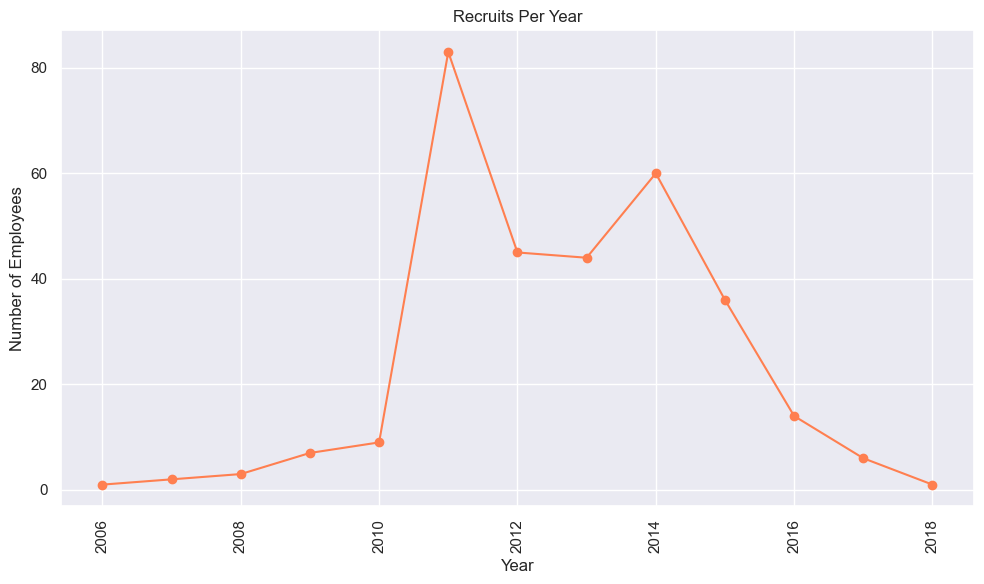

In [119]:
plt.figure(figsize=(10, 6))
recruits_per_year.plot(kind='line', color='coral', marker='o', label='Recruits')
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.title('Recruits Per Year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [120]:
# how many empployees working now?
still_working = hr_data[hr_data['DateofTermination'].isnull()]
print(f'The company currently has: {hr_data[hr_data['DateofTermination'].isnull()].shape[0]} employees still working')

The company currently has: 207 employees still working


In [121]:
quitted_job = hr_data[hr_data['DateofTermination'].notnull()]
manager_quit_count = quitted_job.groupby('ManagerName').size()
print(manager_quit_count)
print(f'The company currently has: {hr_data[hr_data['DateofTermination'].notnull()].shape[0]} employees retired or quitted')
print(f'There are {manager_quit_count.count()} managers have total {manager_quit_count.sum()} employees retired or quitted')

ManagerName
Alex Sweetwater        3
Amy Dunn              13
Brandon R. LeBlanc     2
Brannon Miller         6
David Stanley          6
Debra Houlihan         1
Elijiah Gray           8
Janet King             6
Jennifer Zamora        1
John Smith             3
Kelley Spirea          6
Ketsia Liebig          5
Kissy Sullivan        12
Lynn Daneault          1
Michael Albert         9
Peter Monroe           1
Simon Roup             8
Webster Butler        13
dtype: int64
The company currently has: 104 employees retired or quitted
There are 18 managers have total 104 employees retired or quitted


In [122]:
quitted_job_not_retired = quitted_job.query("TermReason != 'retiring'")

In [123]:
quitted_job_not_retired['years_of_service'].mean()

3.38

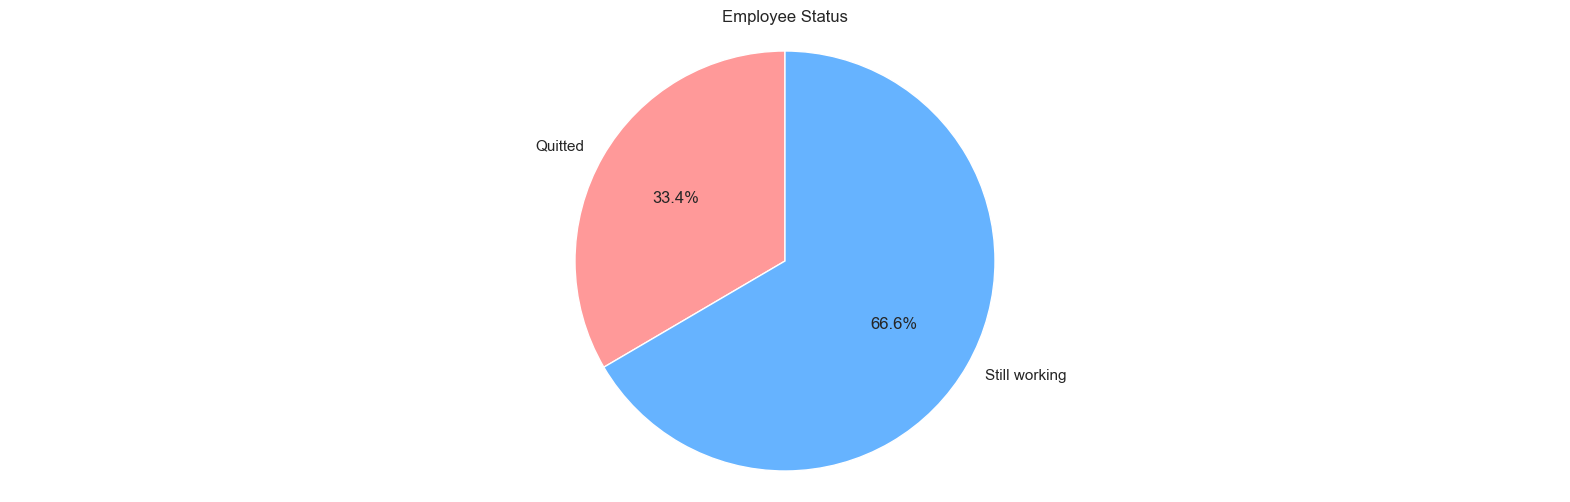

In [124]:
# Calculate percentages
quitted_percentage = round(quitted_job['EmpID'].count() / hr_data['EmpID'].count() * 100, 2)
still_working_percentage = round(still_working['EmpID'].count() / hr_data['EmpID'].count() * 100, 2)

labels = ['Quitted', 'Still working']
sizes = [quitted_percentage, still_working_percentage]
colors = ['#ff9999', '#66b3ff']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Employee Status')
plt.axis('equal')

plt.show()

In [125]:
# check if ManagerName are listed in Employee_Name and find number of manager, number of department
duplicates = hr_data[hr_data.duplicated(subset=['Employee_Name', 'ManagerName'])]
print(f'There is: {duplicates.shape} manager listed in Employee_Name')
print(f'There is: {hr_data['ManagerName'].nunique()} manager for: {hr_data['Department'].nunique()} department')

There is: (0, 39) manager listed in Employee_Name
There is: 21 manager for: 6 department


## Analyze relationship between parameters

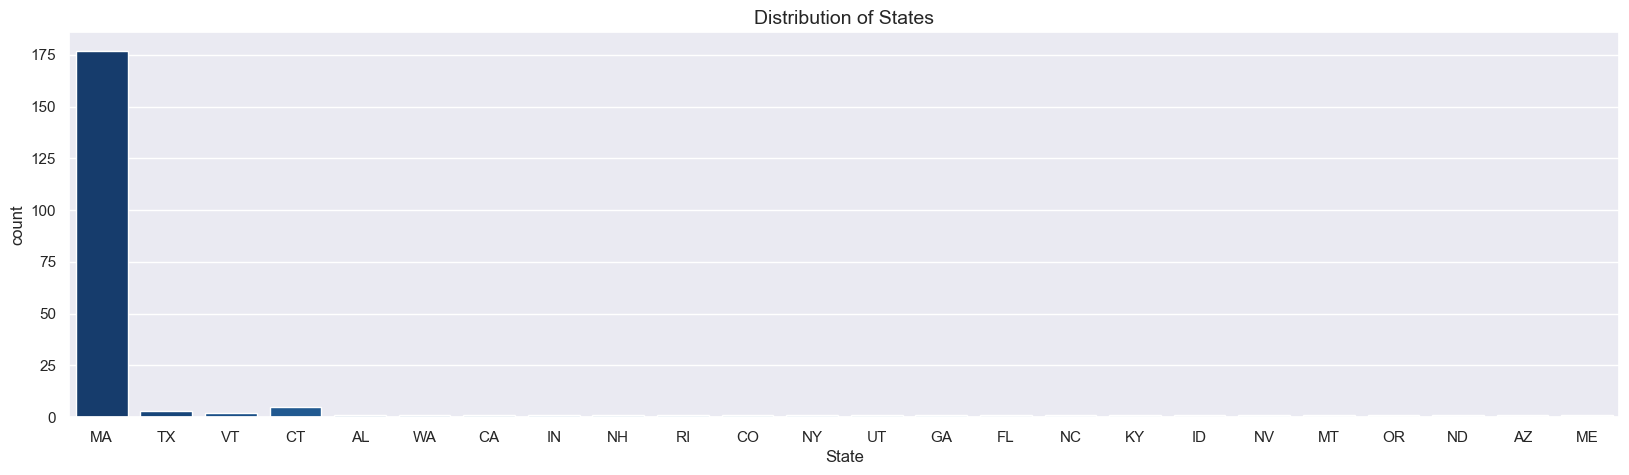

In [126]:
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(x="State", data=still_working, palette="Blues_r")
plt.title('Distribution of States', fontsize=14);

In [127]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_median_wage_and_mean_wage"
response = requests.get(url)
html_content = response.content
soup = BeautifulSoup(html_content, "html.parser")

second_table = soup.find_all("table")[2]

table_data = []
table_rows = second_table.find_all("tr")
for row in table_rows:
  row_data = [cell.get_text(strip=True) for cell in row.find_all(["th", "td"])]
  table_data.append(row_data)

df = pd.DataFrame(table_data)

print(df)

               0                         1                    2  \
0   Nationalrank         Stateor territory  Median wageinUS$[4]   
1              1      District of Columbia              $79,960   
2              2             Massachusetts              $58,540   
3              3                Washington              $50,450   
4              4                    Alaska              $48,820   
5              5                  New York              $48,800   
6              6               Connecticut              $48,720   
7              7                  Maryland              $48,460   
8              8                New Jersey              $48,200   
9              9                  Colorado              $47,940   
10            10                California              $47,920   
11            11              Rhode Island              $47,780   
12            12                    Hawaii              $47,700   
13            13                 Minnesota              $47,59

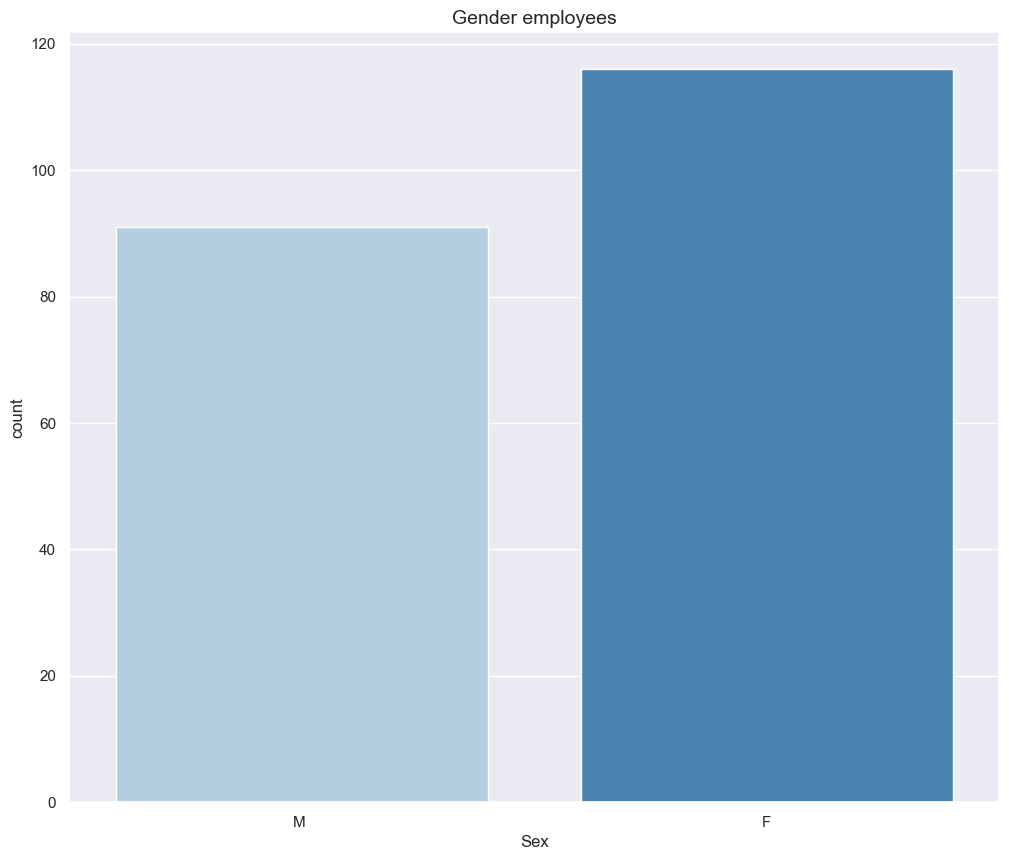

In [128]:
# Gender employees
sns.set(rc={'figure.figsize':(12,10)})
sns.countplot(x=still_working["Sex"], palette="Blues")
plt.title('Gender employees', fontsize=14);

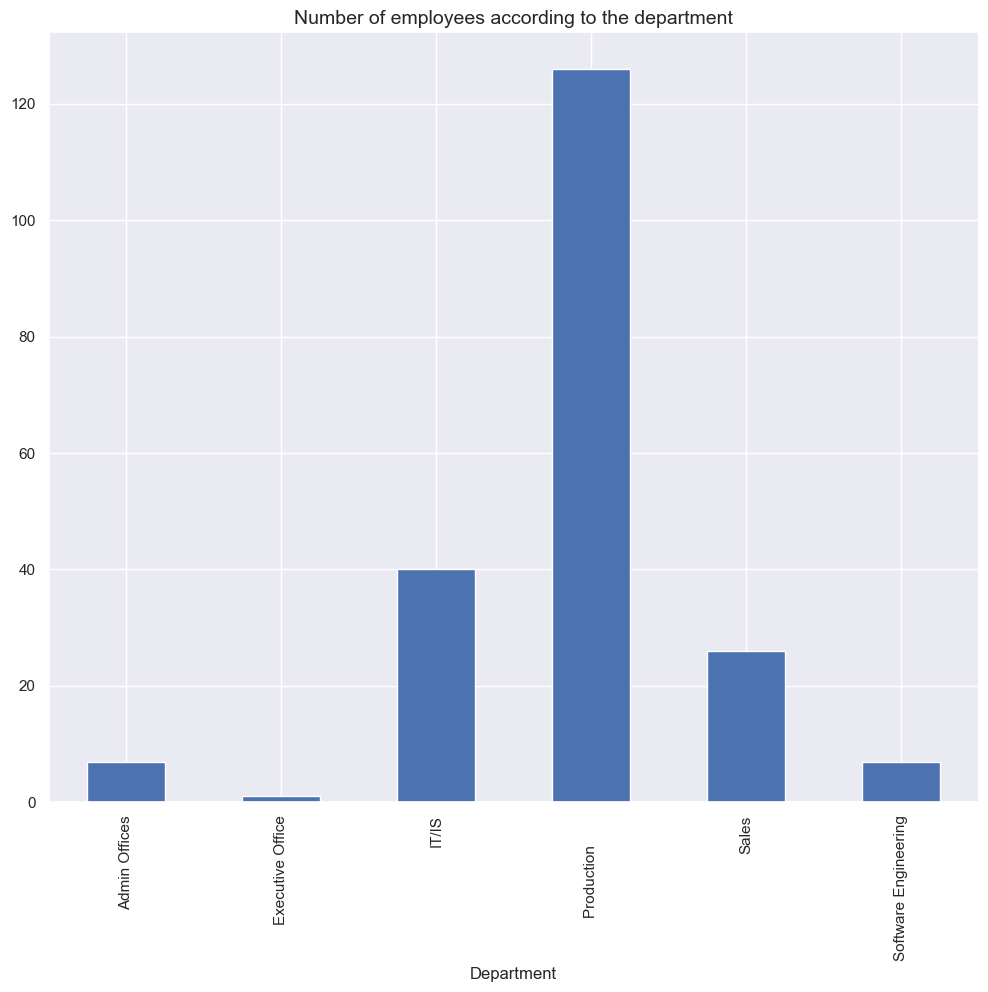

In [129]:
# number of employees according to the department
still_working.groupby('Department')['EmpID'].count().plot(kind='bar')
sns.set(rc={'figure.figsize':(12,5)})
plt.title('Number of employees according to the department', fontsize=14);

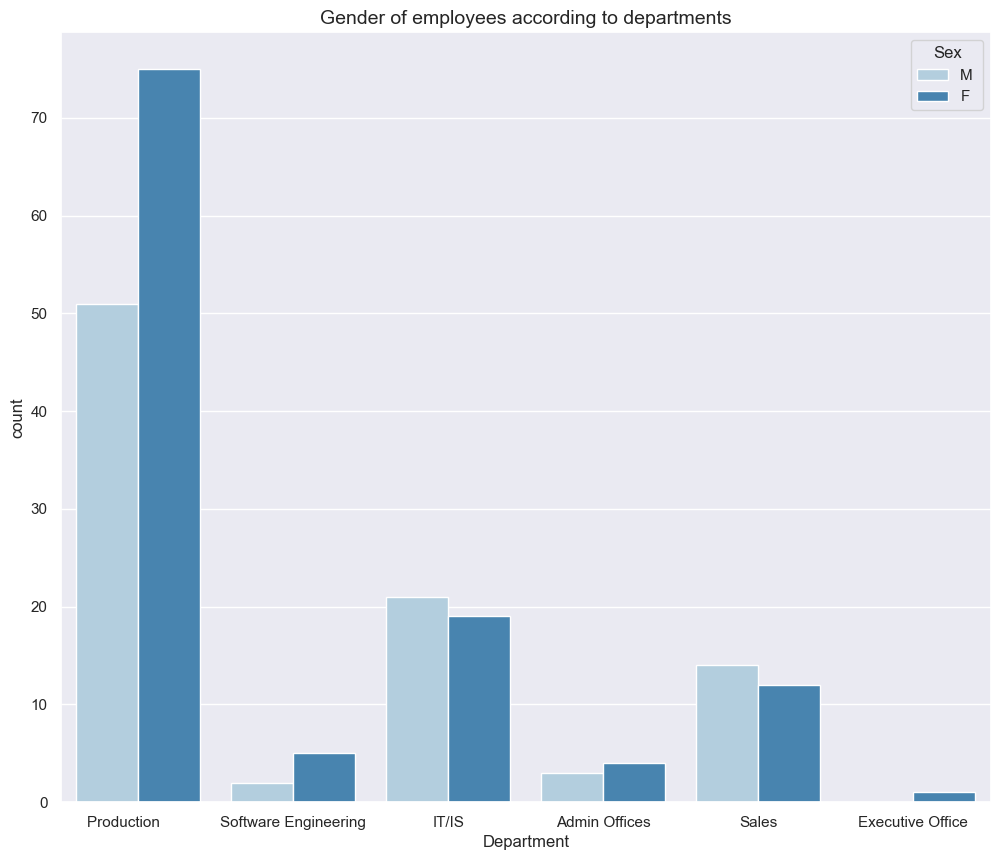

In [130]:
# gender of employees according to departments
sns.set(rc={'figure.figsize':(12,10)})
sns.countplot(x=still_working["Department"],hue=still_working['Sex'], palette="Blues")
plt.title('Gender of employees according to departments', fontsize=14);


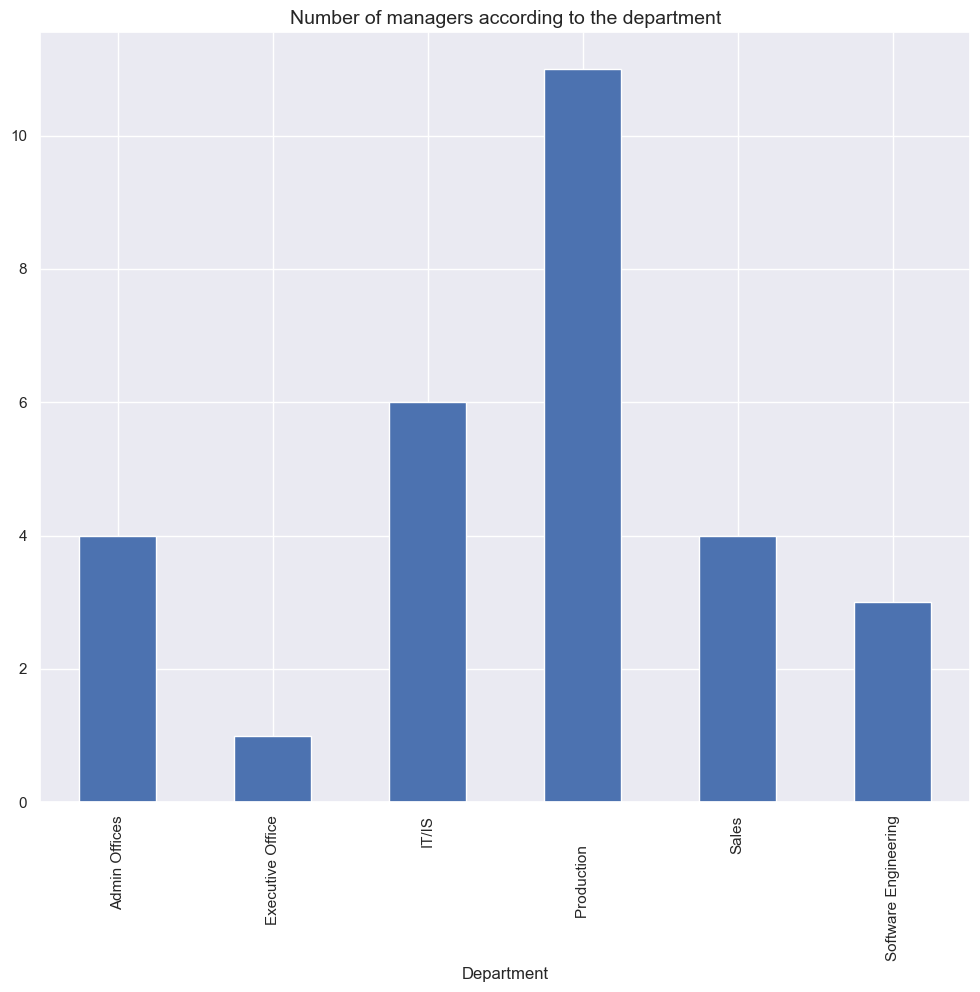

In [131]:
hr_data.groupby('Department')['ManagerID'].nunique().plot(kind='bar')
sns.set(rc={'figure.figsize':(12,5)})
plt.title('Number of managers according to the department', fontsize=14);

In [132]:
hr_data.groupby('Department')['ManagerID'].nunique()

Department
Admin Offices            4
Executive Office         1
IT/IS                    6
Production              11
Sales                    4
Software Engineering     3
Name: ManagerID, dtype: int64

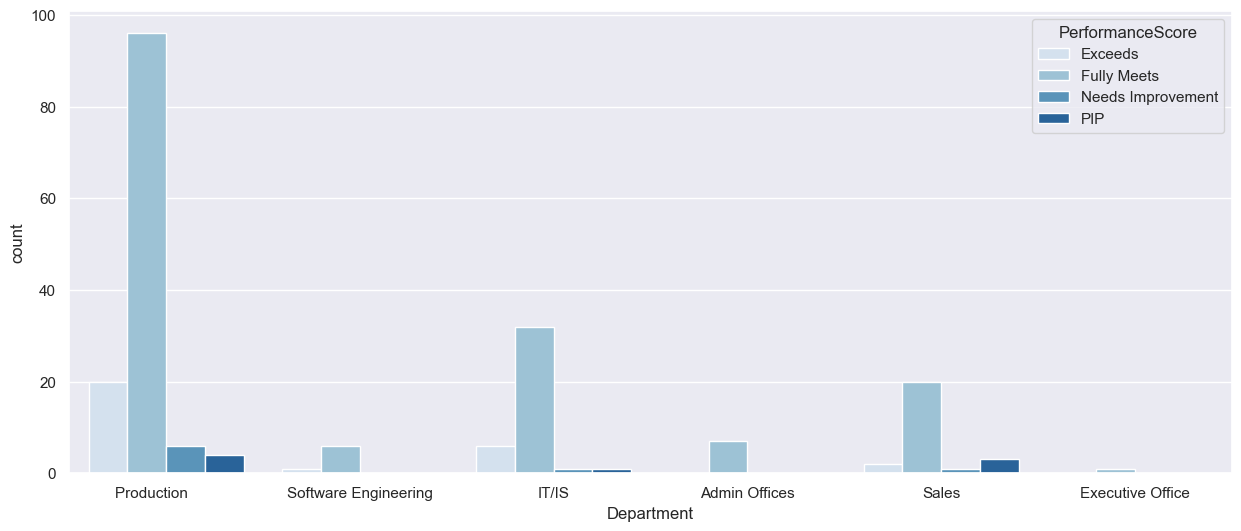

In [133]:
# working performance according to departments
plt.figure(figsize=(15,6))
sns.countplot(data=still_working,x='Department',hue='PerformanceScore', palette="Blues");

In [134]:
# salary distribution according to department
alt.Chart(still_working).mark_boxplot(extent='min-max',
    box = {
        'stroke': 'black',
        'strokeWidth': 2
    },
    median = {
        'color': 'black'
    }
).encode(
    x=alt.X('Department:N', axis=alt.Axis(title='Department', labelAngle=-45, labelFontSize=12)),
    y=alt.Y('Salary:Q', axis=alt.Axis(title='Salary', labelFontSize=12)),
    color='Department:N',
    tooltip=['Department:N', alt.Tooltip('Salary:Q', title='Salary')],
    size=alt.value(60)
).properties(
    title=alt.TitleParams(
        text='Salary distribution according to department',
        fontSize=16
    ),
    width=800,
    height=500
).interactive()

alt.Chart(...)

In [135]:
print(still_working['Salary'].mean())

70694.03381642512


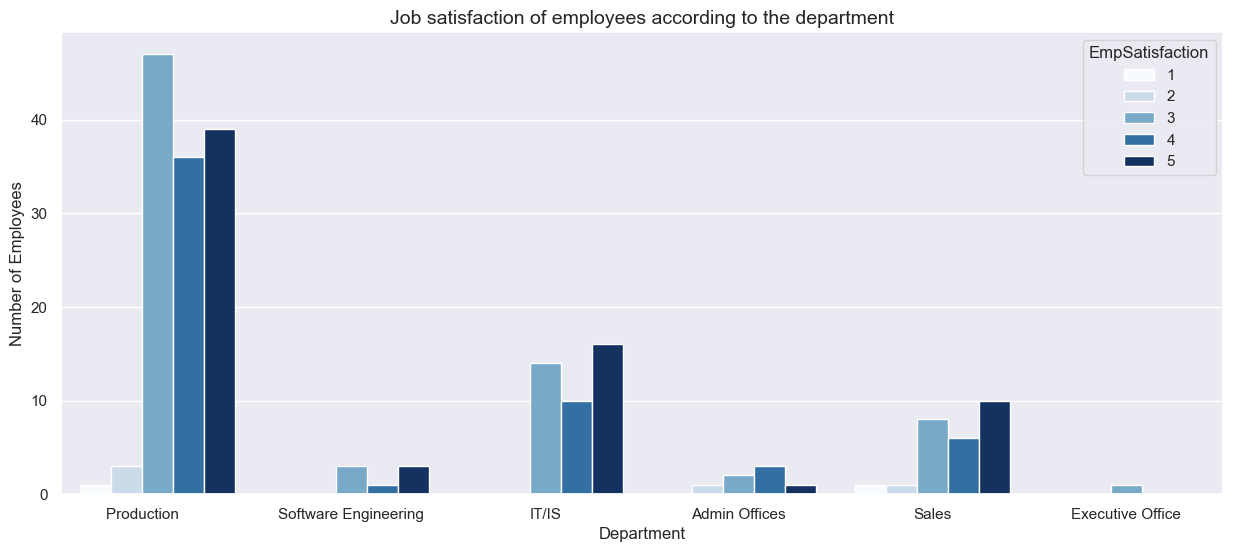

In [136]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(data=still_working, x='Department', hue='EmpSatisfaction', palette="Blues")
plt.title('Job satisfaction of employees according to the department', fontsize=14)
ax.set_ylabel('Number of Employees')
plt.show()

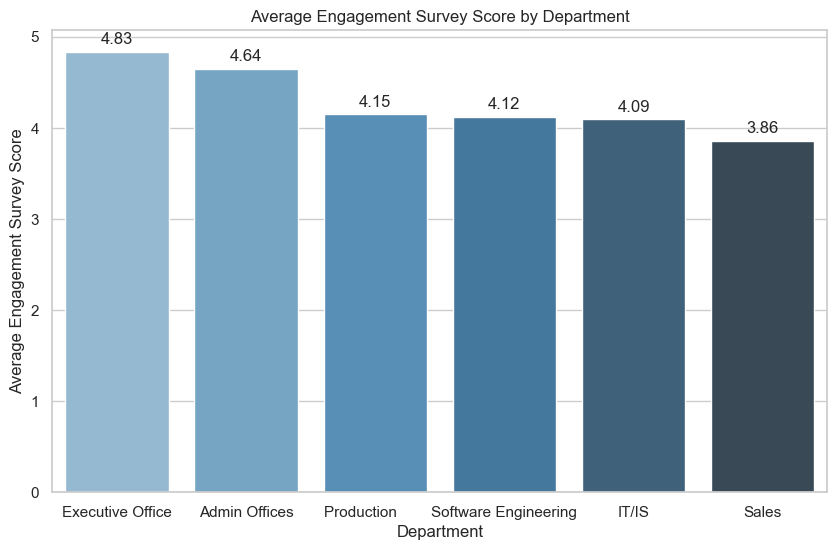

In [137]:
avg_engagement_df = still_working.groupby('Department')['EngagementSurvey'].mean().reset_index()
avg_engagement_df = avg_engagement_df.sort_values(by='EngagementSurvey', ascending=False)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x='Department', y='EngagementSurvey', data=avg_engagement_df, palette='Blues_d')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.xlabel('Department')
plt.ylabel('Average Engagement Survey Score')
plt.title('Average Engagement Survey Score by Department')
plt.show()

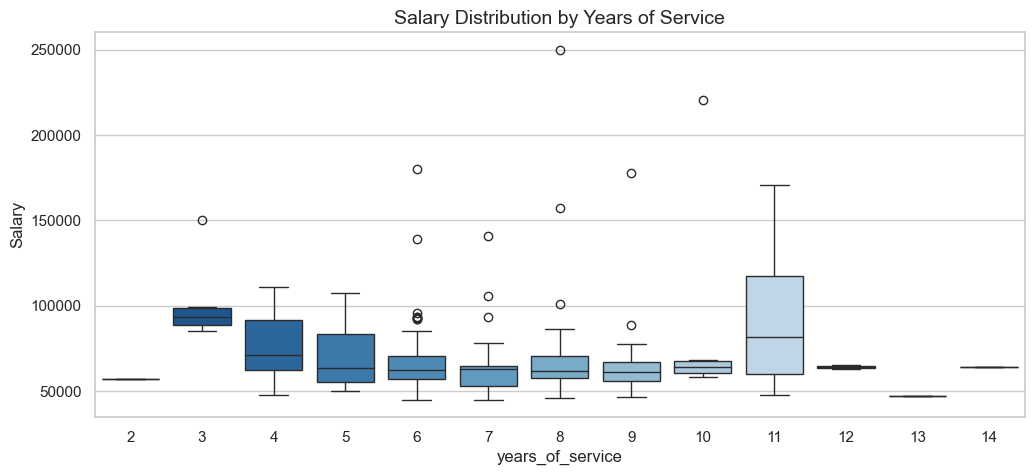

In [138]:
# Check years_of_service and salary
sns.boxplot(x="years_of_service", y="Salary", data=still_working, palette="Blues_r")
plt.title('Salary Distribution by Years of Service', fontsize=14)
plt.show()

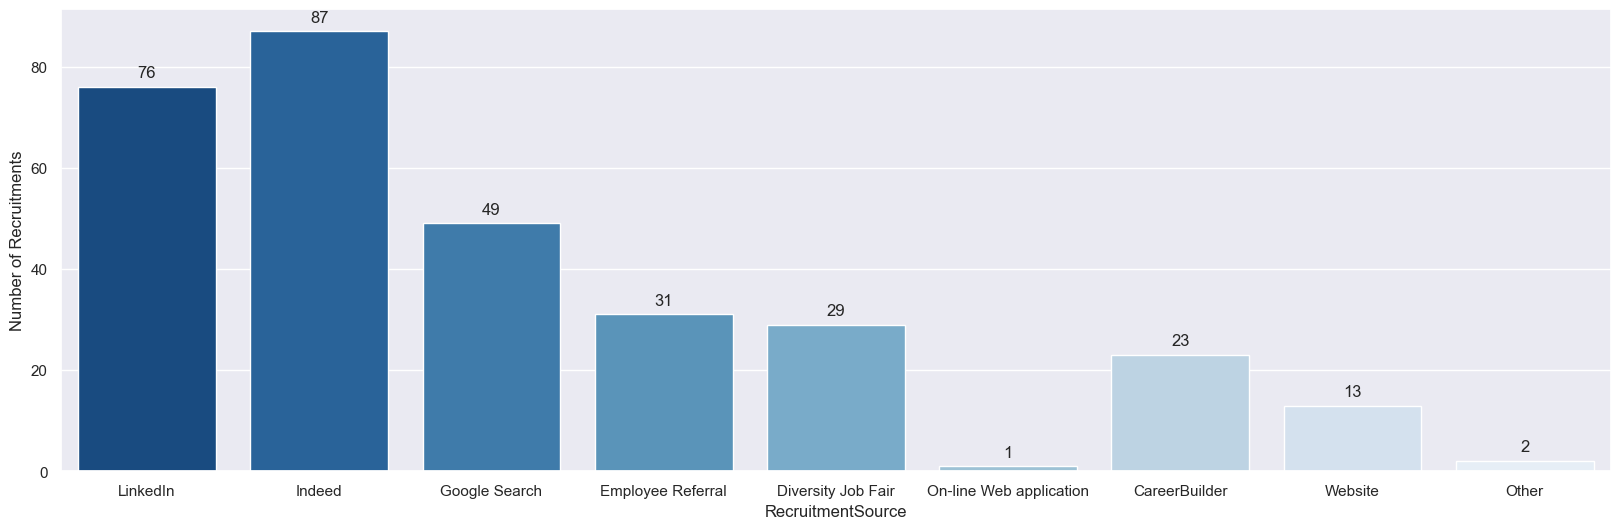

In [139]:
# Recruitment source
sns.set(rc={'figure.figsize':(20,6)})
ax = sns.countplot(x=hr_data['RecruitmentSource'], palette="Blues_r")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
ax.set_ylabel('Number of Recruitments')
plt.show()


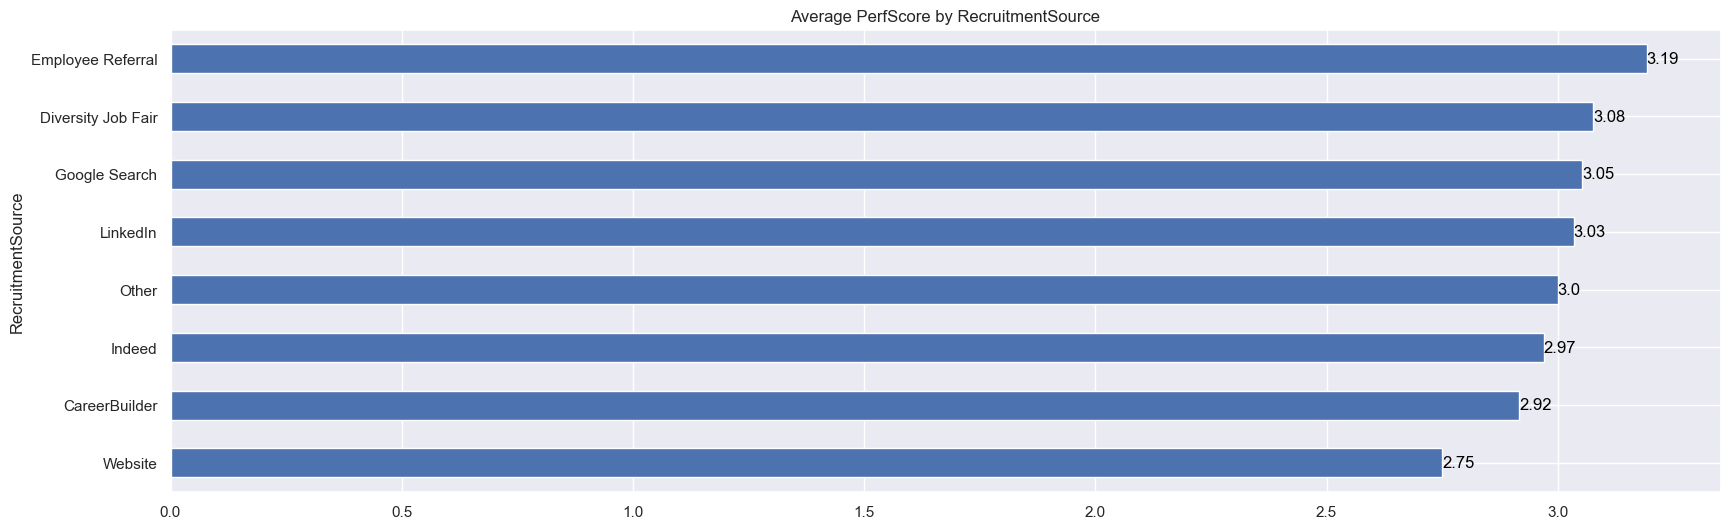

In [140]:
still_working.groupby('RecruitmentSource')['PerfScoreID'].mean().sort_values(ascending=True).plot.barh()
plt.title('Average PerfScore by RecruitmentSource')
title = 'Average PerfScore by RecruitmentSource'
for i, v in enumerate(still_working.groupby('RecruitmentSource')['PerfScoreID'].mean().sort_values(ascending=True)):
    plt.text(v, i, str(round(v,2)), color='black', va='center')
plt.legend().remove()
plt.show()

# What impacts work efficiency?

## Heatmap of correlation among Salary, Employees Satisfaction ,Engagement and Performance Score

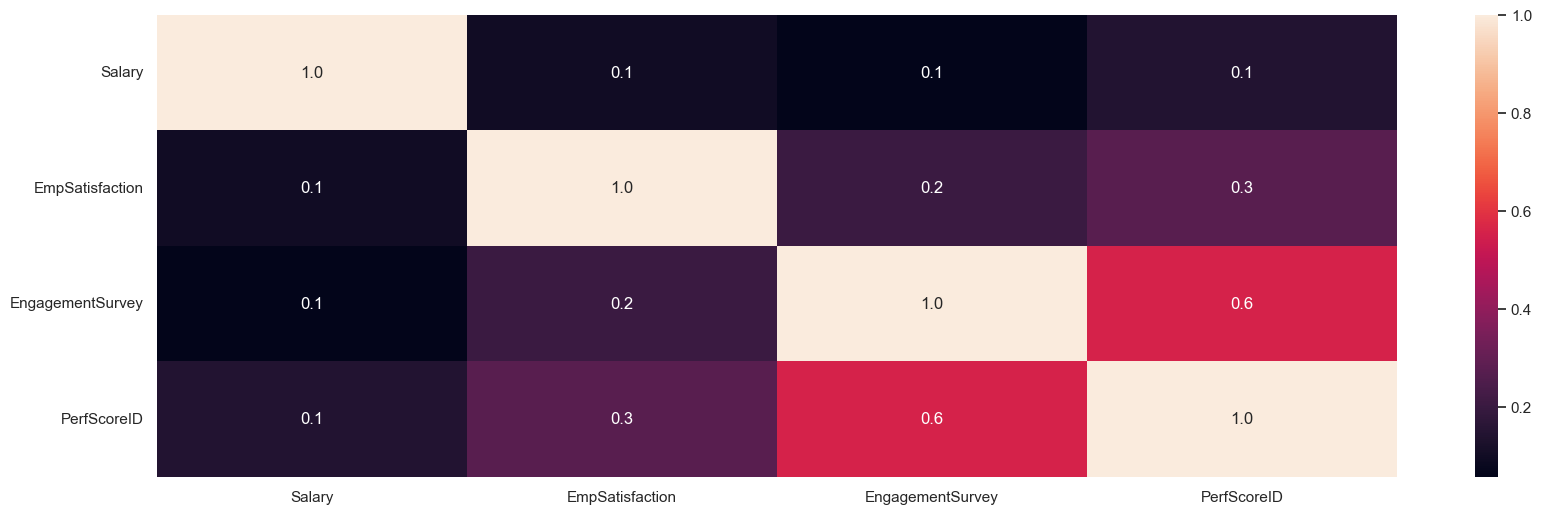

In [141]:
sns.heatmap(still_working.loc[:,['Salary','EmpSatisfaction','EngagementSurvey','PerfScoreID']].corr(), annot=True, fmt="1.1f");

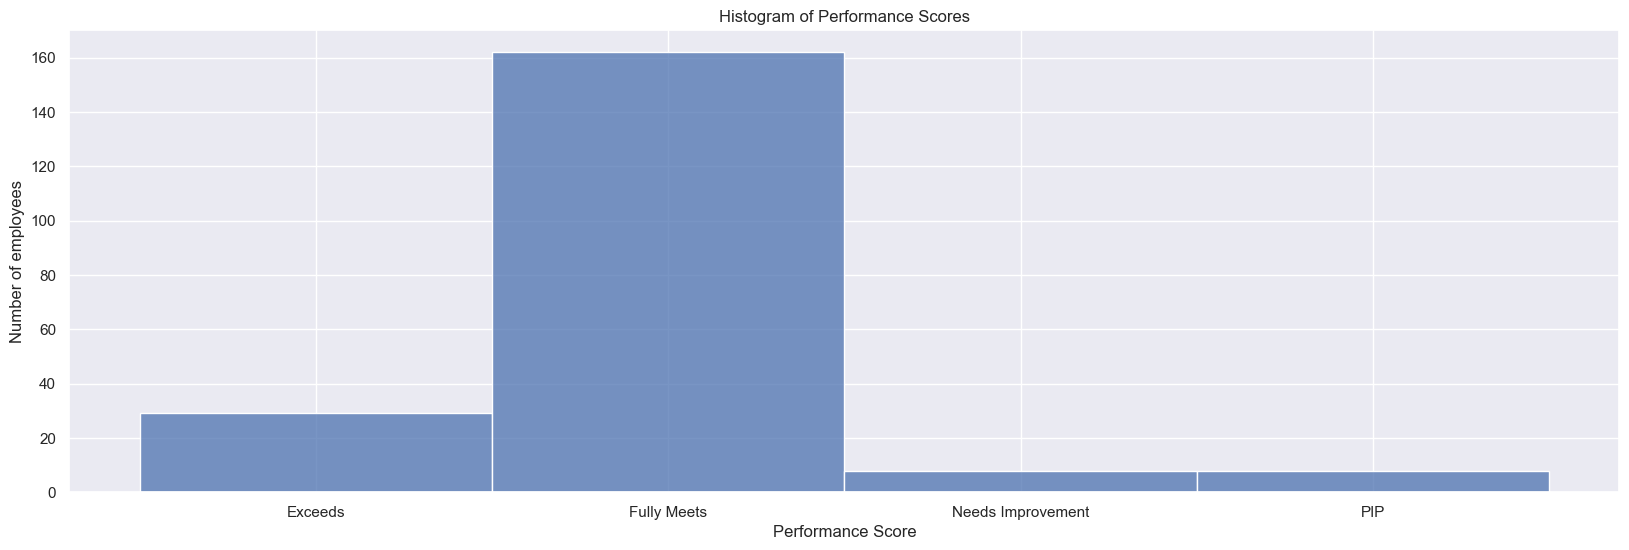

In [142]:
# histogram of performance 
sns.histplot(data=still_working, x='PerformanceScore', bins=10)

plt.xlabel('Performance Score')
plt.ylabel('Number of employees')
plt.title('Histogram of Performance Scores');

## Salary and Performance Score

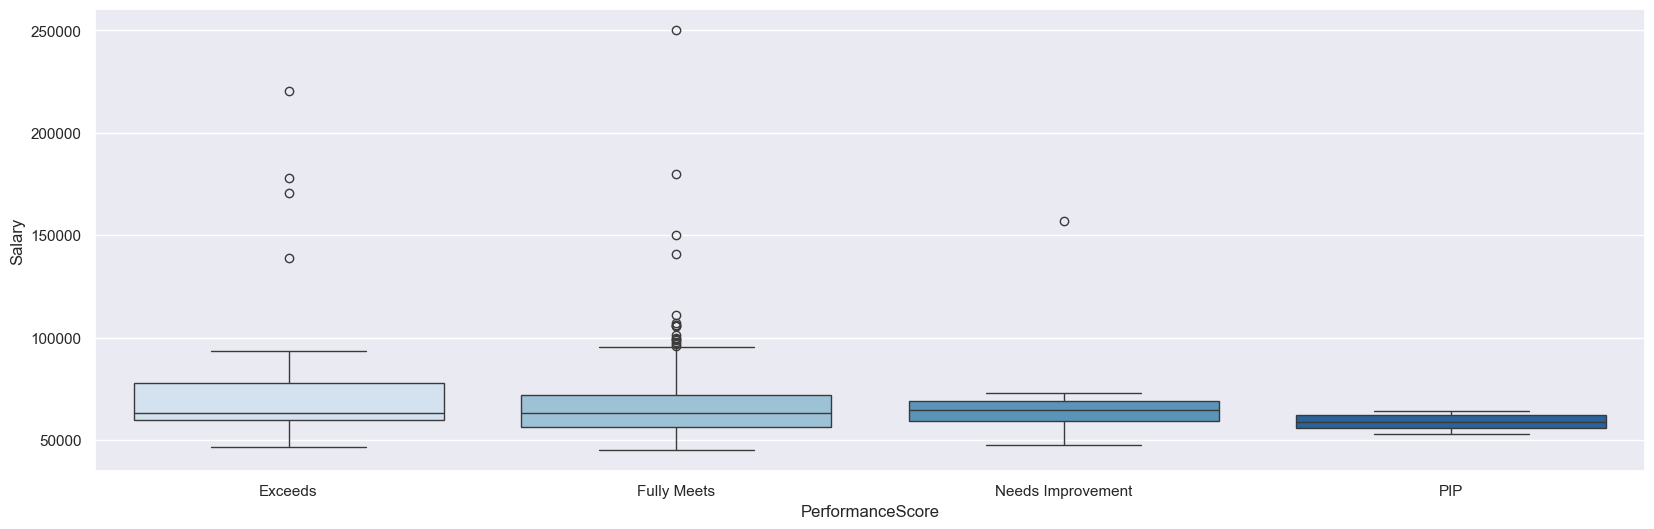

In [143]:
# Salary vs Performance Score
sns.boxplot(data=still_working, x="PerformanceScore", y="Salary", palette='Blues');

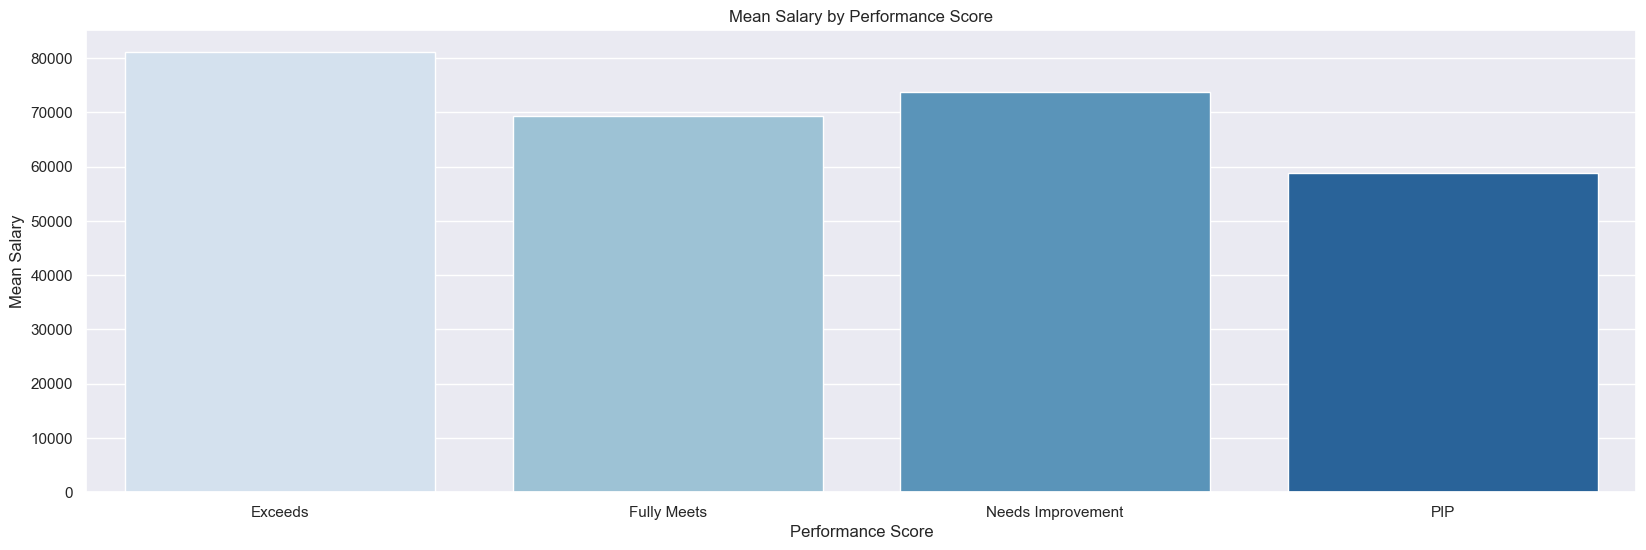

In [144]:
sns.barplot(x='PerformanceScore', y='Salary', data=still_working.groupby('PerformanceScore')['Salary'].mean().reset_index(), palette='Blues')
plt.xlabel('Performance Score')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by Performance Score')
plt.show()

## Employees Satisfaction and Performance Score

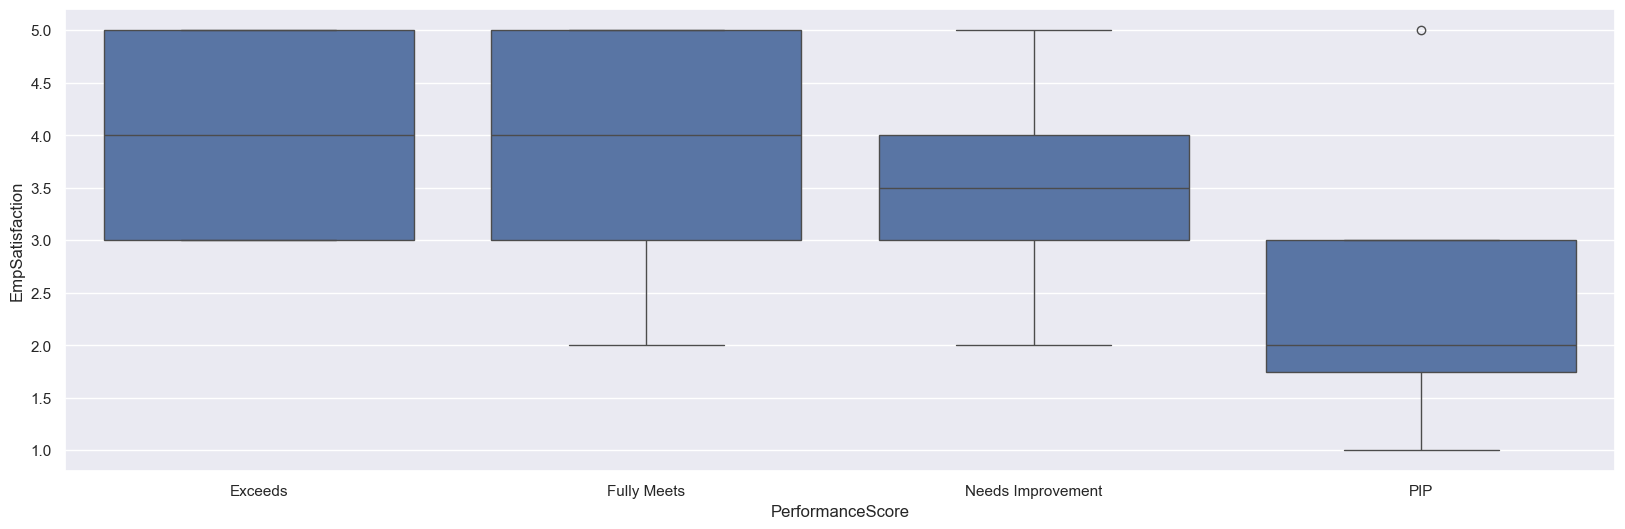

In [145]:
sns.boxplot(data=still_working, x="PerformanceScore", y="EmpSatisfaction");

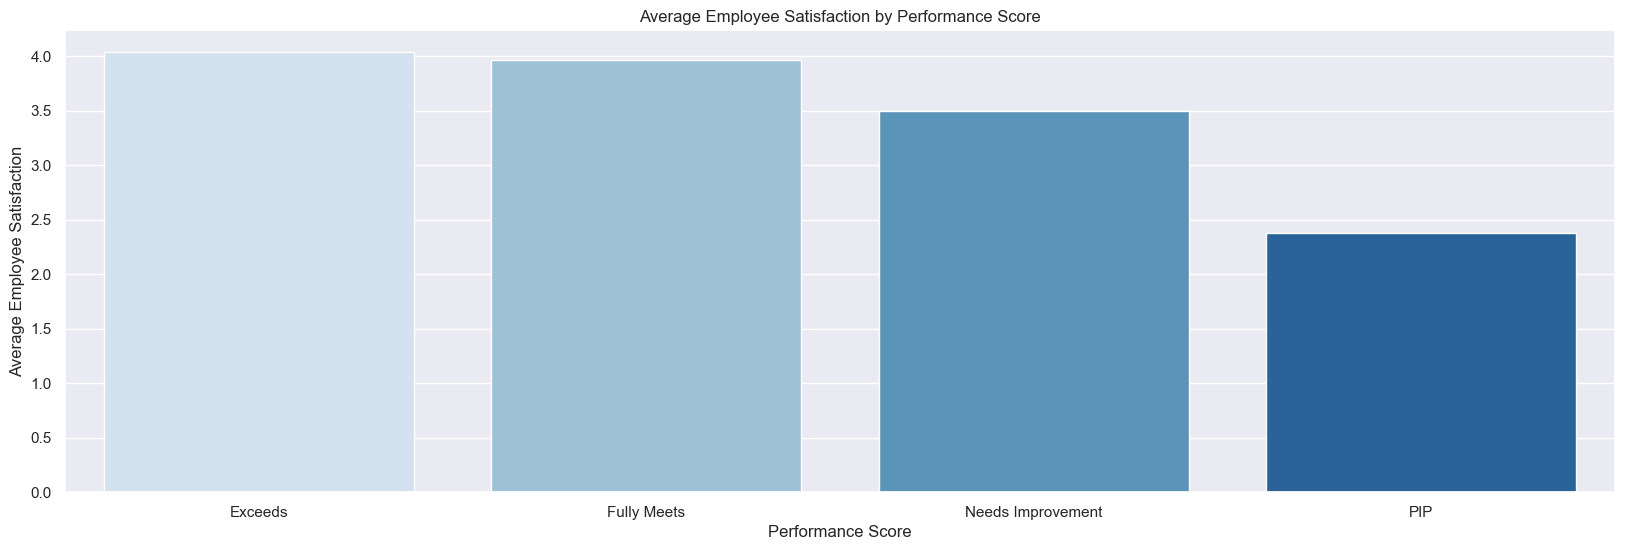

In [146]:
# Average Employees Satisfaction by Performance Score
sns.barplot(x='PerformanceScore', y='EmpSatisfaction', data=still_working.groupby('PerformanceScore')['EmpSatisfaction'].mean().reset_index(), palette='Blues')
plt.xlabel('Performance Score')
plt.ylabel('Average Employee Satisfaction')
plt.title('Average Employee Satisfaction by Performance Score')
plt.show()

## Engagement and Performance Score

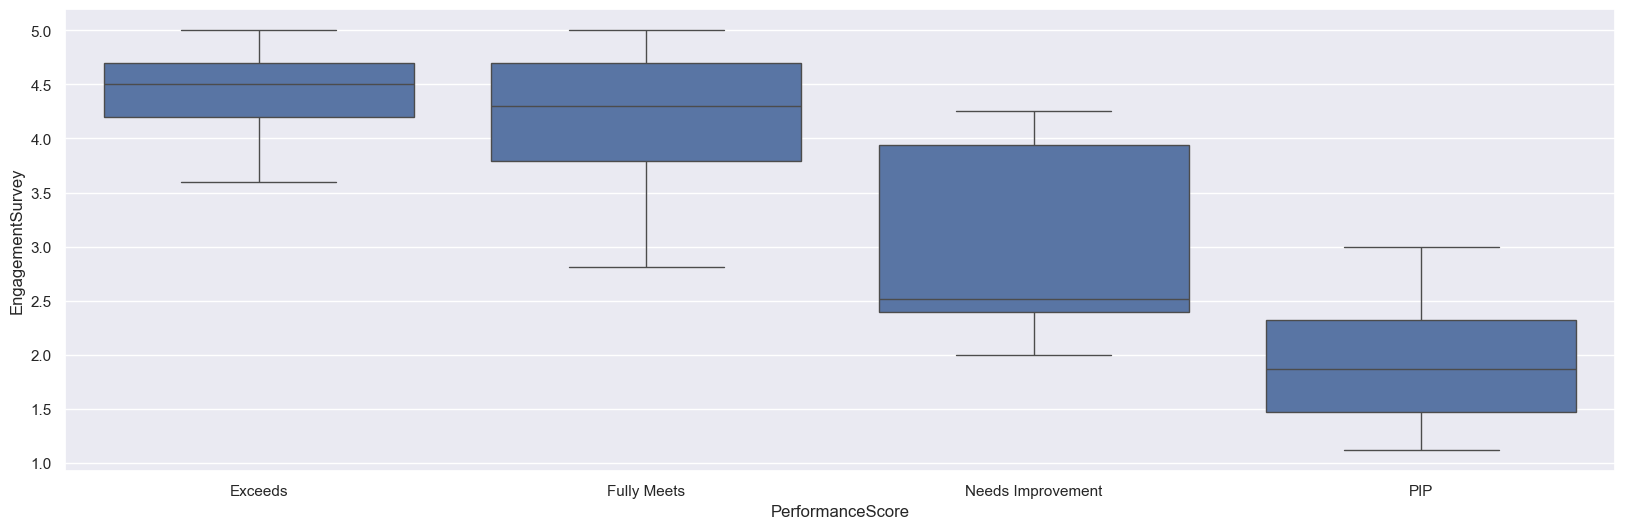

In [147]:
sns.boxplot(data=still_working, x="PerformanceScore", y="EngagementSurvey");

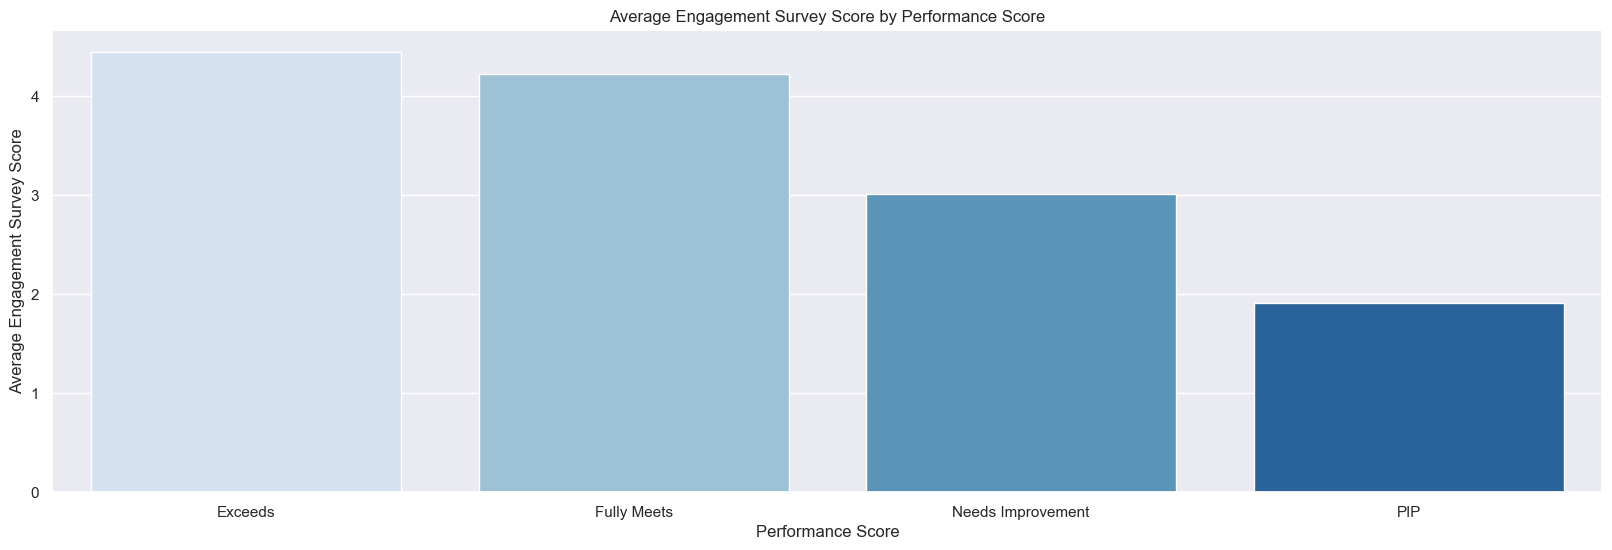

In [148]:
# Average Engagement by Performance Score
sns.barplot(x='PerformanceScore', y='EngagementSurvey', data=still_working.groupby('PerformanceScore')['EngagementSurvey'].mean().reset_index(), palette='Blues')
plt.xlabel('Performance Score')
plt.ylabel('Average Engagement Survey Score')
plt.title('Average Engagement Survey Score by Performance Score')
plt.show()

## Performance Score by Manager

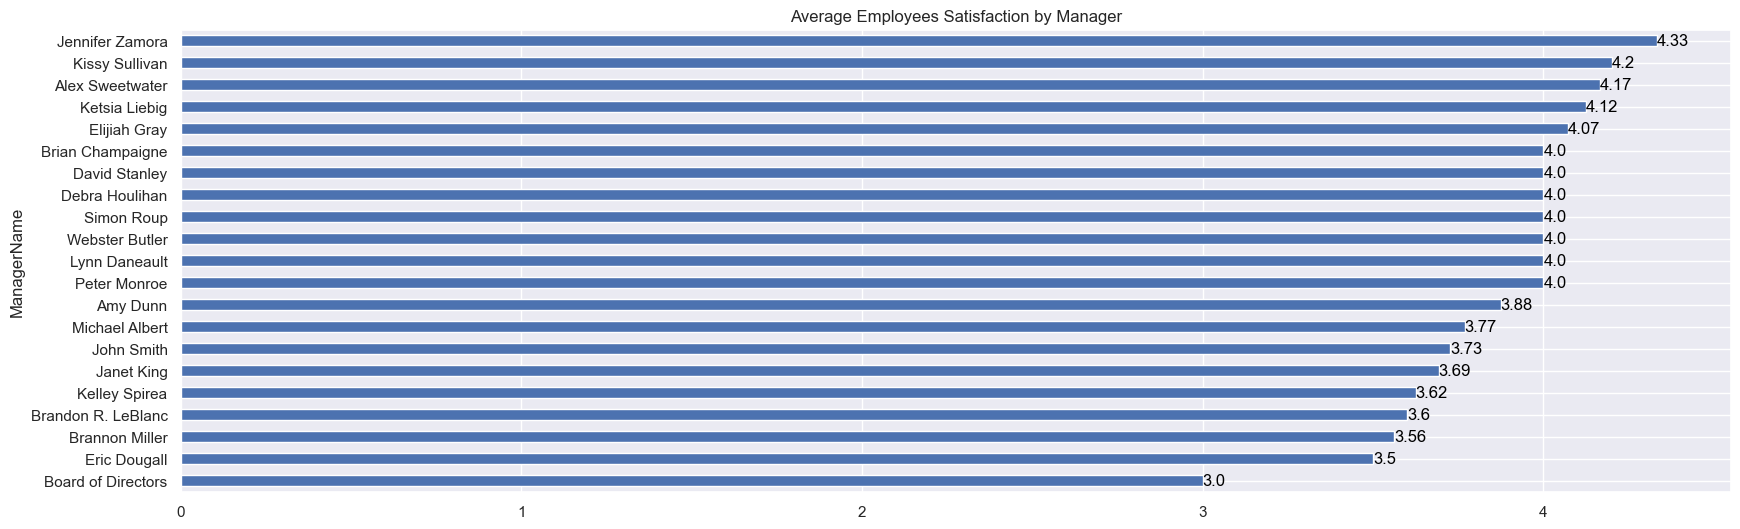

In [149]:
still_working.groupby('ManagerName')['EmpSatisfaction'].mean().sort_values(ascending=True).plot.barh()
for i, v in enumerate(still_working.groupby('ManagerName')['EmpSatisfaction'].mean().sort_values(ascending=True)):
    plt.text(v, i, str(round(v,2)), color='black', va='center')
plt.title('Average Employees Satisfaction by Manager')
title = 'Average Employees Satisfaction by Manager'
plt.legend().remove()
plt.show()

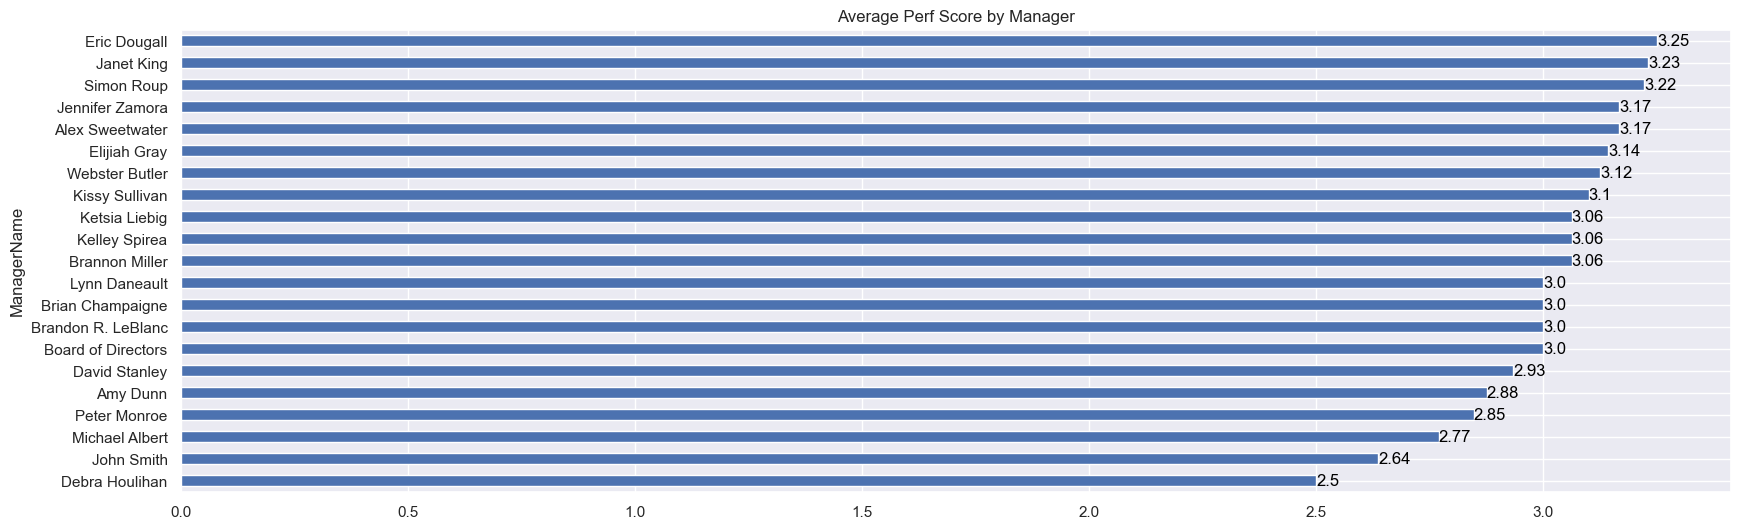

In [150]:
still_working.groupby('ManagerName')['PerfScoreID'].mean().sort_values(ascending=True).plot.barh()
for i, v in enumerate(still_working.groupby('ManagerName')['PerfScoreID'].mean().sort_values(ascending=True)):
    plt.text(v, i, str(round(v,2)), color='black', va='center')
plt.title('Average Perf Score by Manager')
plt.show()

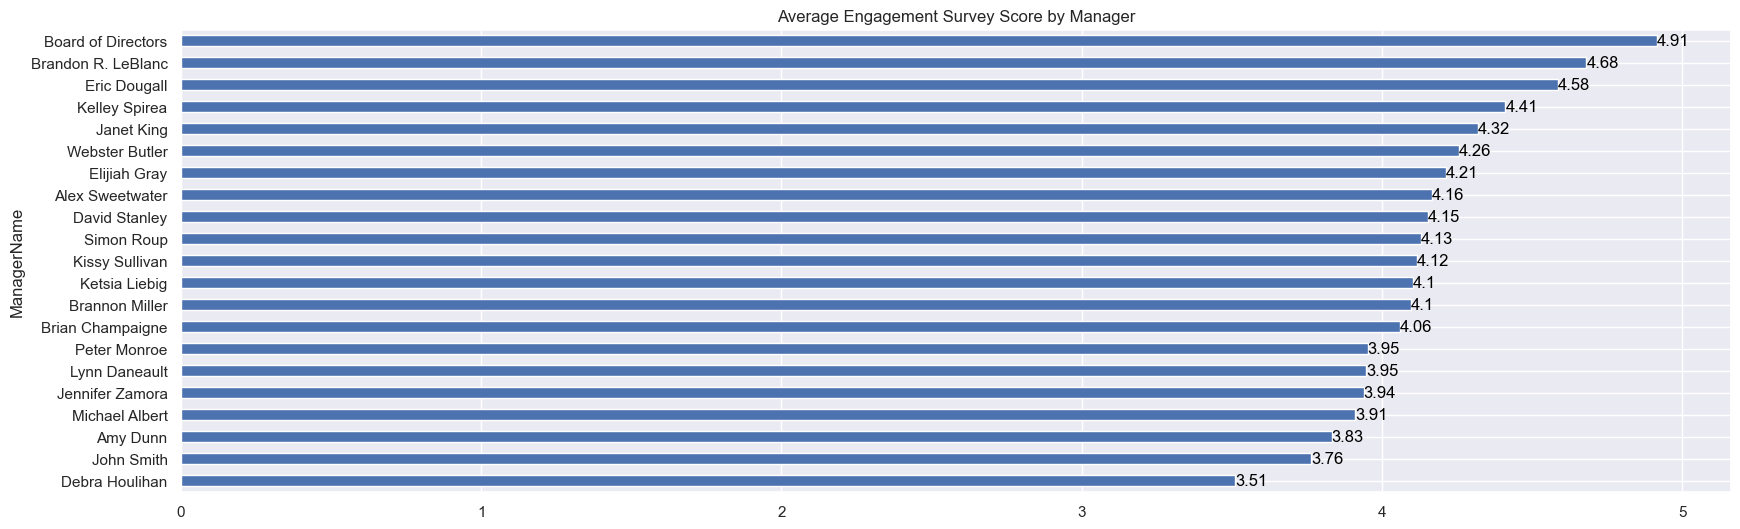

In [151]:
still_working.groupby('ManagerName')['EngagementSurvey'].mean().sort_values(ascending=True).plot.barh()
for i, v in enumerate(still_working.groupby('ManagerName')['EngagementSurvey'].mean().sort_values(ascending=True)):
    plt.text(v, i, str(round(v,2)), color='black', va='center')
plt.title('Average Engagement Survey Score by Manager')
plt.show()

In [152]:
# create new dataset store managers and count each performance type of employees
still_working_hr_data_mgr=pd.DataFrame(hr_data.groupby(['ManagerName','PerfScoreID'])['Employee_Name'].count())
still_working_hr_data_mgr=still_working_hr_data_mgr.unstack()
still_working_hr_data_mgr=still_working_hr_data_mgr.reset_index()
still_working_hr_data_mgr=still_working_hr_data_mgr.T.reset_index(drop=True).T
still_working_hr_data_mgr=still_working_hr_data_mgr.rename(columns={0:'Manager',1:'PIP',2:'Needs Improvement',3:'Fully Meets',4:'Exceeds'})
still_working_hr_data_mgr=still_working_hr_data_mgr.fillna(0)
still_working_hr_data_mgr['Total']=still_working_hr_data_mgr.sum(numeric_only=True, axis=1)

In [153]:
# Calculate percentage of 'Needs Improvement' and 'PIP' as 'Negative'
still_working_hr_data_mgr['Positive%']=((still_working_hr_data_mgr['Exceeds']+still_working_hr_data_mgr['Fully Meets'])/still_working_hr_data_mgr['Total']*100).round(2)

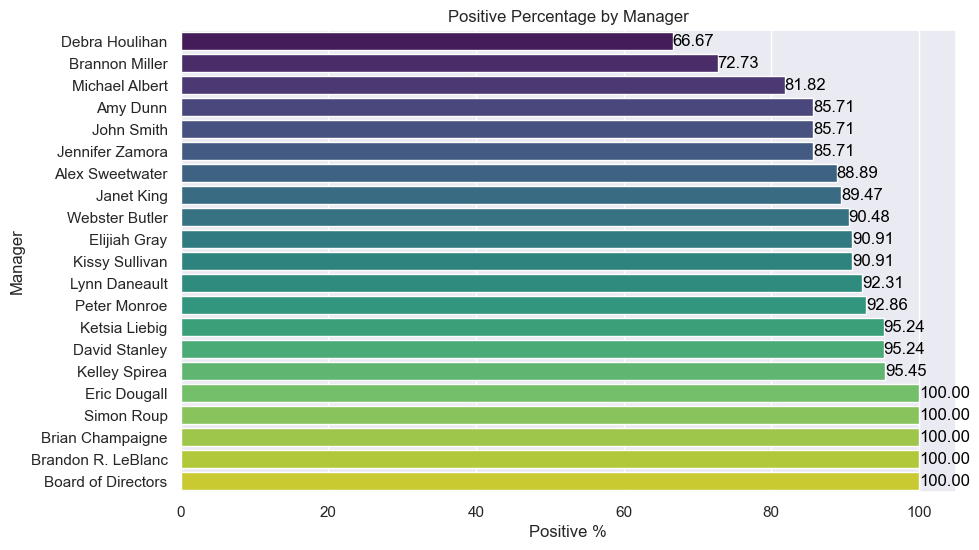

In [154]:
still_working_hr_data_mgr.sort_values(by='Positive%', ascending=True, inplace=True)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='Positive%', y='Manager', data=still_working_hr_data_mgr, palette='viridis')

# Add labels to the bars
for i, v in enumerate(still_working_hr_data_mgr['Positive%']):
    plt.text(v, i, f'{v:.2f}', color='black', va='center')

# Remove the legend
plt.legend().remove()

# Show the plot
plt.xlabel('Positive %')
plt.ylabel('Manager')
plt.title('Positive Percentage by Manager')
plt.show()

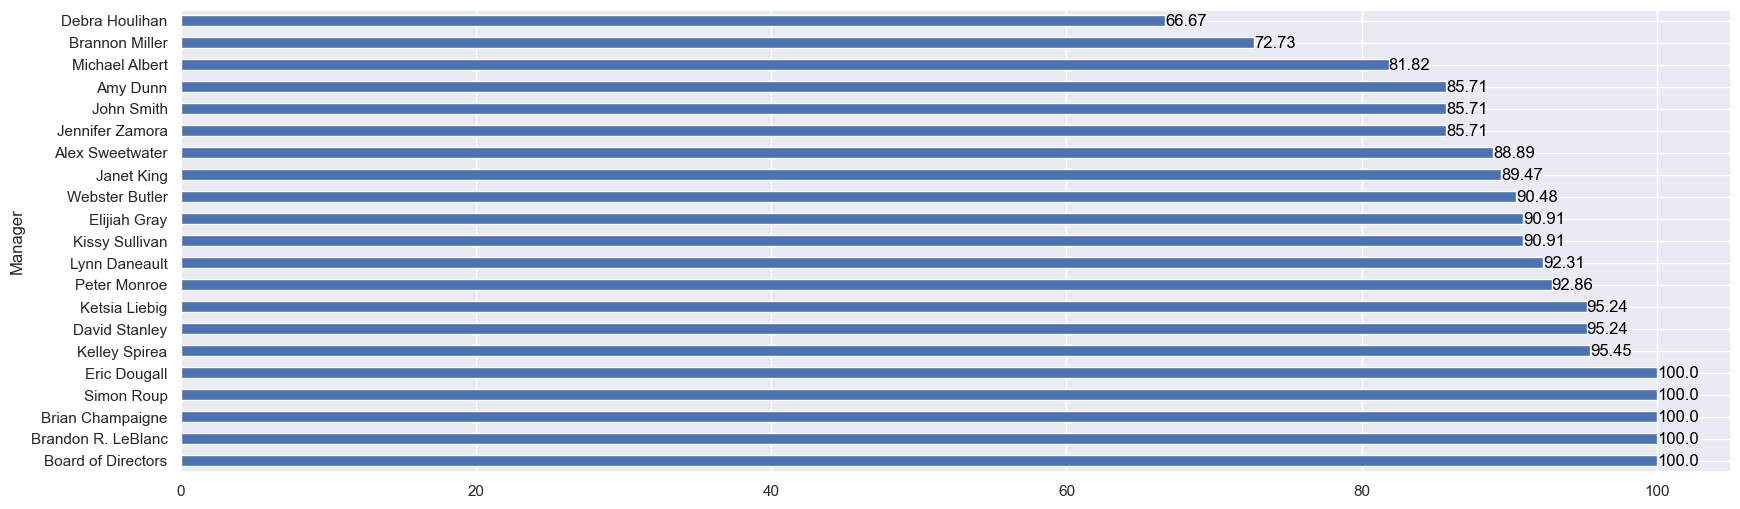

In [155]:
still_working_hr_data_mgr.sort_values(by='Positive%',ascending=False).plot.barh(x='Manager',y='Positive%') # type: ignore
for i, v in enumerate(still_working_hr_data_mgr.sort_values(by='Positive%',ascending=False)['Positive%']): # type: ignore
    plt.text(v, i, str(v), color='black', va='center')
plt.legend().remove()
plt.show()

In [156]:
still_working_hr_data_mgr['manager_category'] = still_working_hr_data_mgr['Positive%'].apply(lambda x: 'Good' if x == 100 else 'Other')

In [157]:
still_working_hr_data_mgr

,Manager,PIP,Needs Improvement,Fully Meets,Exceeds,Total,Positive%,manager_category
7,Debra Houlihan,0.0,1.0,2.0,0.0,3.0,66.67,Other
4,Brannon Miller,5.0,1.0,9.0,7.0,22.0,72.73,Other
17,Michael Albert,1.0,3.0,16.0,2.0,22.0,81.82,Other
1,Amy Dunn,2.0,1.0,15.0,3.0,21.0,85.71,Other
12,John Smith,2.0,0.0,12.0,0.0,14.0,85.71,Other
11,Jennifer Zamora,0.0,1.0,4.0,2.0,7.0,85.71,Other
0,Alex Sweetwater,0.0,1.0,6.0,2.0,9.0,88.89,Other
10,Janet King,0.0,2.0,13.0,4.0,19.0,89.47,Other
20,Webster Butler,0.0,2.0,17.0,2.0,21.0,90.48,Other
8,Elijiah Gray,0.0,2.0,18.0,2.0,22.0,90.91,Other


### Salary Gap between Good managers and Other managers

In [158]:
# avg salary according to manager categories
x1=still_working.query("ManagerName in ['Board of Directors', 'Brandon R. LeBlanc','Brian Champaigne','Eric Dougall','Simon Roup']")['Salary'].mean()
x2=still_working.query("ManagerName != ['Board of Directors', 'Brandon R. LeBlanc','Brian Champaigne','Eric Dougall','Simon Roup']")['Salary'].mean()

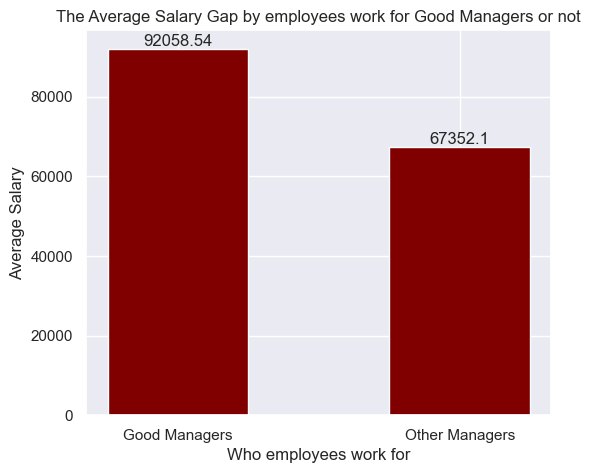

In [159]:
data = {'Good Managers':x1, 'Other Managers':x2}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (6, 5))
bars = plt.bar(courses, values, color ='maroon', width = 0.5)

plt.xlabel("Who employees work for")
plt.ylabel("Average Salary")
plt.title("The Average Salary Gap by employees work for Good Managers or not")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')
plt.show()

### Employees engagement Gap between Good managers and Other managers

In [160]:
y1=still_working.query("ManagerName in ['Board of Directors', 'Brandon R. LeBlanc','Brian Champaigne','Eric Dougall','Simon Roup']")['EngagementSurvey'].mean()
y2=still_working.query("ManagerName != ['Board of Directors', 'Brandon R. LeBlanc','Brian Champaigne','Eric Dougall','Simon Roup']")['EngagementSurvey'].mean()

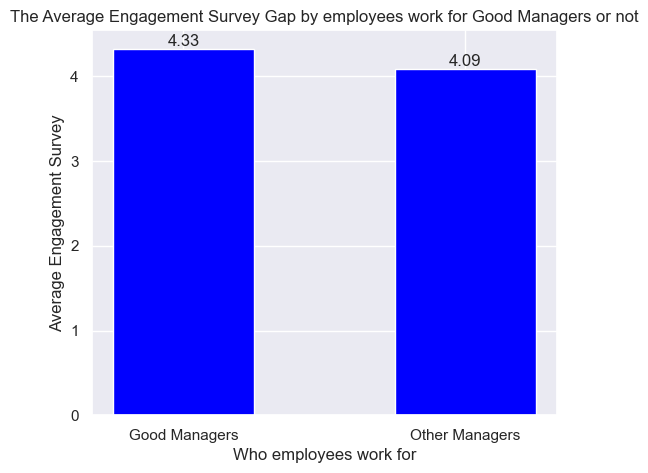

In [161]:
data = {'Good Managers':y1, 'Other Managers':y2}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (6, 5))
 
bars = plt.bar(courses, values, color ='blue', width = 0.5)

plt.xlabel("Who employees work for")
plt.ylabel("Average Engagement Survey")
plt.title("The Average Engagement Survey Gap by employees work for Good Managers or not")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.show()

### Employees satisfaction Gap between Good managers and Other managers

In [162]:
z1=still_working.query("ManagerName in ['Board of Directors', 'Brandon R. LeBlanc','Brian Champaigne','Eric Dougall','Simon Roup']")['EmpSatisfaction'].mean()
z2=still_working.query("ManagerName != ['Board of Directors', 'Brandon R. LeBlanc','Brian Champaigne','Eric Dougall','Simon Roup']")['EmpSatisfaction'].mean()

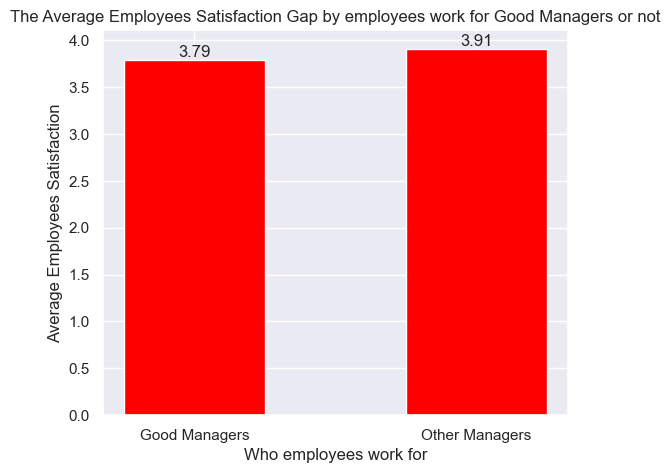

In [163]:
data = {'Good Managers':z1, 'Other Managers':z2}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (6, 5))

bars = plt.bar(courses, values, color ='red', width = 0.5)

plt.xlabel("Who employees work for")
plt.ylabel("Average Employees Satisfaction")
plt.title("The Average Employees Satisfaction Gap by employees work for Good Managers or not")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.show()

# Why employees quitted job?

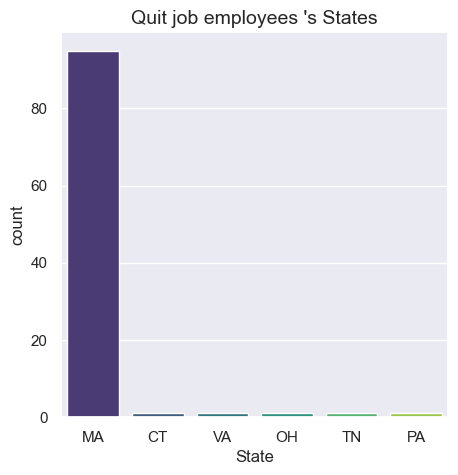

In [164]:
# Distribution of States
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x="State", data=quitted_job_not_retired, palette="viridis")
plt.title("Quit job employees 's States", fontsize=14);

In [165]:
quitted_job['TermReason'].value_counts()

TermReason
Another position                    20
unhappy                             14
more money                          11
career change                        9
hours                                8
attendance                           7
return to school                     5
relocation out of area               5
no-call, no-show                     4
military                             4
retiring                             4
performance                          4
maternity leave - did not return     3
medical issues                       3
Learned that he is a gangster        1
Fatal attraction                     1
gross misconduct                     1
Name: count, dtype: int64

In [166]:
reason_mapping = {
  "positive": ["Another position", "career change", "return to school", 
              "relocation out of area", "military", "retiring"],
  "negative": ["unhappy", "more money", "hours", "attendance", "performance",
               "no-call, no-show", "maternity leave - did not return", 
               "medical issues", "Learned that he is a gangster", 
               "Fatal attraction", "gross misconduct"]
}

# Create a new column with positive/negative classification
def classify_reason(reason):
  if reason in reason_mapping["positive"]:
    return "positive"
  elif reason in reason_mapping["negative"]:
    return "negative"
  else:
    return "unknown"

quitted_job["Reason_Type"] = quitted_job["TermReason"].apply(classify_reason)

In [167]:
print(quitted_job.groupby('Reason_Type')['Reason_Type'].count())

Reason_Type
negative    57
positive    47
Name: Reason_Type, dtype: int64


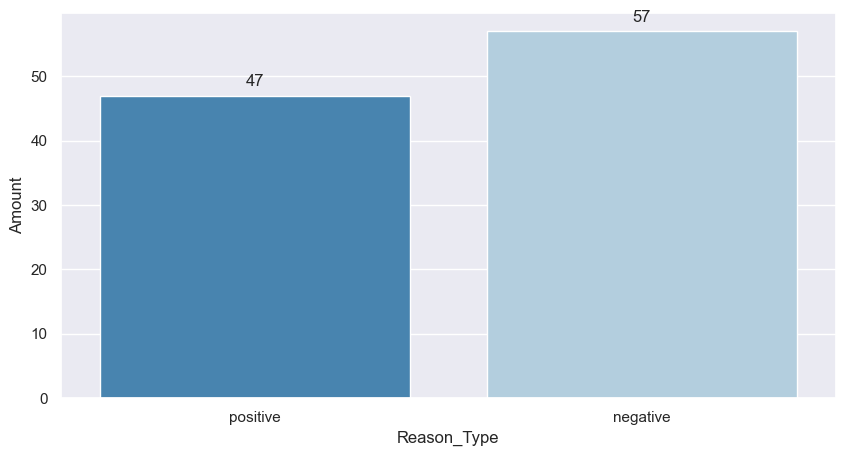

In [168]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot(x=quitted_job['Reason_Type'], palette="Blues_r")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
ax.set_ylabel('Amount')

plt.show()

## Average Performance Score Comparison

In [169]:
quit_avg_performance = quitted_job['PerfScoreID'].mean()
working_avg_performance = still_working['PerfScoreID'].mean()

<Figure size 800x600 with 0 Axes>

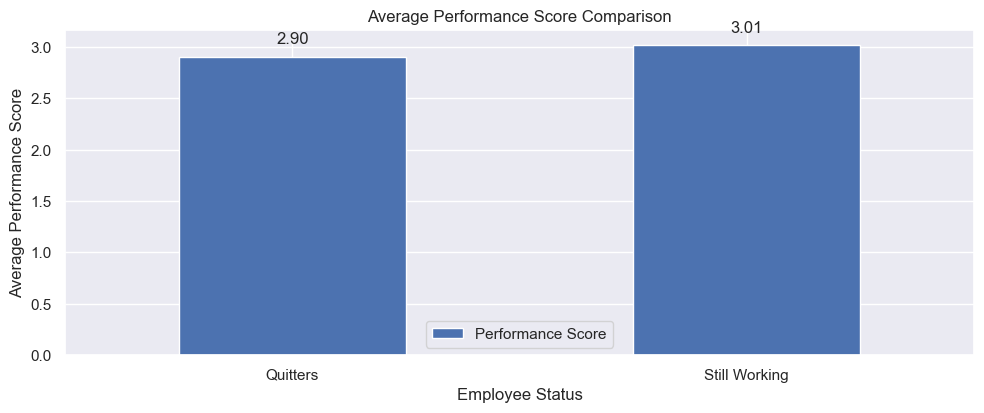

In [170]:
data = {'Employee Status': ['Quitters', 'Still Working'],
        'Performance Score': [quit_avg_performance, working_avg_performance]}

df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
df.set_index('Employee Status').plot(kind='bar', stacked=True)
plt.xlabel('Employee Status')
plt.ylabel('Average Performance Score')
plt.title('Average Performance Score Comparison')
x = df.index
y = df.sum(numeric_only=True, axis=1)

for i, value in enumerate(y):
    plt.text(x[i], value + 0.1, f"{value:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.xticks(rotation=0)
plt.show();

## Average Salary Comparison

In [171]:
quit_avg_salary = quitted_job['Salary'].mean()
working_avg_salary = still_working['Salary'].mean()

<Figure size 800x600 with 0 Axes>

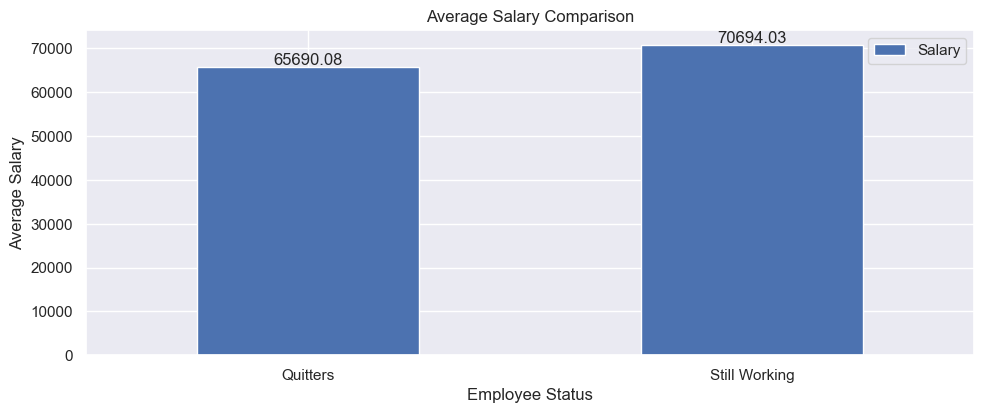

In [172]:
data = {'Employee Status': ['Quitters', 'Still Working'],
        'Salary': [quit_avg_salary, working_avg_salary]}

df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
df.set_index('Employee Status').plot(kind='bar', stacked=True)
plt.xlabel('Employee Status')
plt.ylabel('Average Salary')
plt.title('Average Salary Comparison')
x = df.index
y = df.sum(numeric_only=True, axis=1)

for i, value in enumerate(y):
    plt.text(x[i], value + 0.1, f"{value:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.xticks(rotation=0)
plt.show();

## Influence of management dictionaries to quitted employees

### Count quitted employees 's performance according to manager dictionaries

In [173]:
a1=quitted_job.query("ManagerName in ['Board of Directors', 'Brandon R. LeBlanc','Brian Champaigne','Eric Dougall','Simon Roup']")['PerfScoreID'].mean()
a2=quitted_job.query("ManagerName != ['Board of Directors', 'Brandon R. LeBlanc','Brian Champaigne','Eric Dougall','Simon Roup']")['PerfScoreID'].mean()

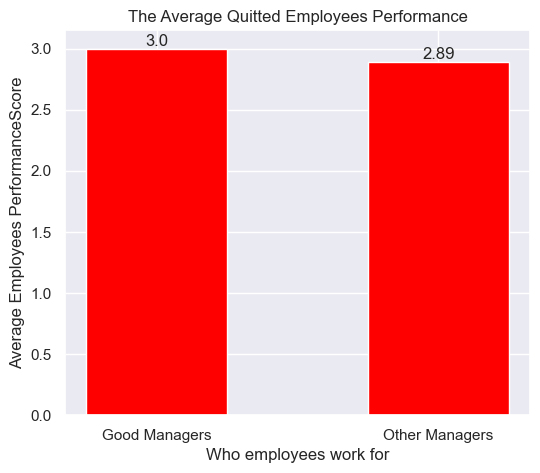

In [174]:
data = {'Good Managers':a1, 'Other Managers':a2}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (6, 5))

bars = plt.bar(courses, values, color ='red', width = 0.5)

plt.xlabel("Who employees work for")
plt.ylabel("Average Employees PerformanceScore")
plt.title("The Average Quitted Employees Performance")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.show()

In [175]:
quit_reason_by_manager = pd.crosstab(quitted_job['ManagerName'], quitted_job['Reason_Type'])
print(quit_reason_by_manager)

Reason_Type         negative  positive
ManagerName                           
Alex Sweetwater            2         1
Amy Dunn                  10         3
Brandon R. LeBlanc         1         1
Brannon Miller             3         3
David Stanley              1         5
Debra Houlihan             1         0
Elijiah Gray               3         5
Janet King                 2         4
Jennifer Zamora            1         0
John Smith                 1         2
Kelley Spirea              5         1
Ketsia Liebig              2         3
Kissy Sullivan             7         5
Lynn Daneault              1         0
Michael Albert             6         3
Peter Monroe               1         0
Simon Roup                 6         2
Webster Butler             4         9


### Count quitted employees according to manager dictionaries

In [176]:
b1=quitted_job.query("ManagerName in ['Board of Directors', 'Brandon R. LeBlanc','Brian Champaigne','Eric Dougall','Simon Roup']")['Reason_Type'].count()
b2=quitted_job.query("ManagerName != ['Board of Directors', 'Brandon R. LeBlanc','Brian Champaigne','Eric Dougall','Simon Roup']")['Reason_Type'].count()

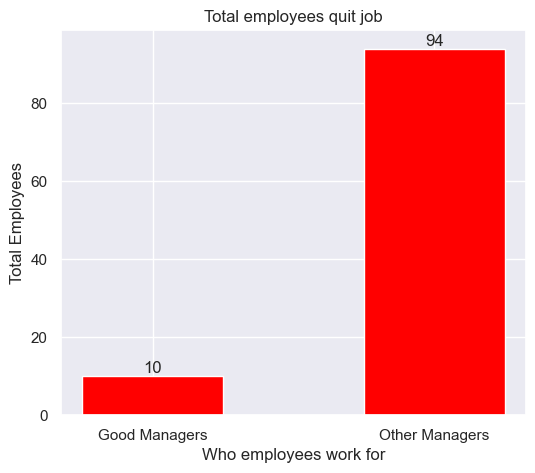

In [177]:
data = {'Good Managers':b1, 'Other Managers':b2}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (6, 5))

bars = plt.bar(courses, values, color ='red', width = 0.5)

plt.xlabel("Who employees work for")
plt.ylabel("Total Employees")
plt.title("Total employees quit job")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.show()

In [178]:
b1=quitted_job.query("ManagerName in ['Board of Directors', 'Brandon R. LeBlanc','Brian Champaigne','Eric Dougall','Simon Roup']")['EmpID'].count()/hr_data.query("ManagerName in ['Board of Directors', 'Brandon R. LeBlanc','Brian Champaigne','Eric Dougall','Simon Roup']")['EmpID'].count()*100
b2=quitted_job.query("ManagerName != ['Board of Directors', 'Brandon R. LeBlanc','Brian Champaigne','Eric Dougall','Simon Roup']")['EmpID'].count()/hr_data.query("ManagerName != ['Board of Directors', 'Brandon R. LeBlanc','Brian Champaigne','Eric Dougall','Simon Roup']")['EmpID'].count()*100

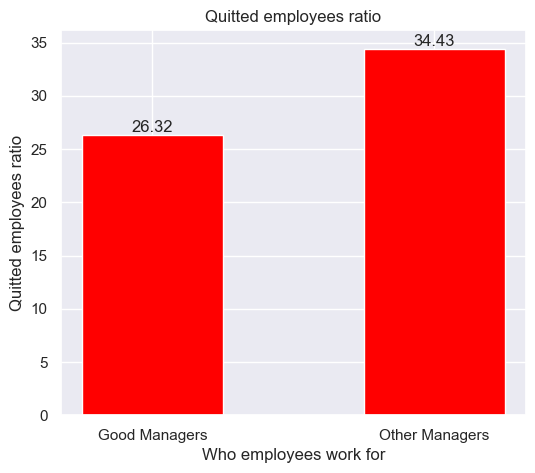

In [179]:
data = {'Good Managers':b1, 'Other Managers':b2}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (6, 5))

bars = plt.bar(courses, values, color ='red', width = 0.5)

plt.xlabel("Who employees work for")
plt.ylabel("Quitted employees ratio")
plt.title("Quitted employees ratio")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.show()